This is purposefully a pretty quick and poorly-performing test, since we are not really training models for very long. Make sure you can run everything here successfully to get familiar with the BioAutoMATED platform!

In [1]:
import sys
sys.path.insert(1, 'main_classes/')
import warnings
warnings.filterwarnings("ignore")
from wrapper import run_bioautomated
import shutil
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make directory where these results can live - no need to run if already have a directory
#os.mkdir('./exemplars/')

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

False

# General Parameters (can be changed)

### input arguments 
- task : str, one of 'binary_classification', 'multiclass_classification', 'regression'
- data_folder : str representing folder where data is stored
- data_file : str representing file name where data is stored
- sequence_type : str, either 'nucleic_acid', 'peptide', or 'glycan'
- model_folder : str representing folder where models are to be stored
- output_folder : str representing folder where output is to be stored
- automl_search_techniques : str representing which AutoML search technique should be performed, one of 'all', 'deepswarm', 'autokeras', 'tpot'
- do_backup : bool representing if a backup should be performed
- max_runtime_minutes : int representing max runtime for model search in minutes
- num_folds : int representing num folds
- verbosity : int representing 0=not verbose, 1=verbose
- do_auto_bin : bool representing if target values should be automatically binned
- bin_threshold : float representing threshold for positive and negative classes
- do_transform : bool representing if target values should be transformed
- input_col : str representing input column name where sequences can be located
- target_col : str representing target column name where target values can be located
- pad_seqs : str indicating pad_seqs method, either 'max', 'min', 'average'
- augment_data : str, either 'none', 'complement', 'reverse_complement', or 'both_complements'
- dataset_robustness : bool indicating if data ablation study should be performed
- num_final_epochs : int representing number of final epochs to train final deepswarm model
- yaml_params : dict of extra deepswarm parameters, with keys 'max_depth' (int), 'ant_count' (int), 'epochs' (int)
- num_generations : int representing number of generations of tpot search
- population_size : int representing population size of tpot search
- run_interpretation : bool indicating if interpretation module should be executed
- interpret_params : dict of extra interpretation parameters, with keys 'sample_number_class_activation_maps' (int), 'class_activation_grad_modifier' (str), 'class_activation_layer_index' (int), 'sample_number_saliency_maps' (int), 'saliency_map_grad_modifier' (str), 'saliency_map_layer_index' (int), 'sample_number_mutagenesis' (int)
- run_design : bool indicating if design module should be executed
- design_params : dict of extra design parameters, with keys 'k' (int), 'substitution_type' (str), 'target_y' (float), 'class_of_interest' (int), 'constraint_file_path' (str), 'de_novo_num_seqs_to_test' (int), 'storm_num_seqs_to_test' (int), 'num_of_optimization_rounds' (int)

In [3]:
# specify parameters for the actual search (example)
max_runtime_minutes = 60 # time in minutes to give to each implemented AutoML algorithms
num_folds = 2 # recommend 3 - 5 folds for robustness

# Deepswarm execution
num_final_epochs = 10
yaml_params = {'ant_count': 1, 'max_depth': 2, 'epochs': 5}

# TPOT execution
num_generations = 5
population_size = 5

Note that this runtime (10 minutes) may be too short for your machine's computing capabilites (see note under Troubleshooting in the Installation Guide). If so, please change max_runtime_minutes to 60. Make sure to reset the graph operations of BioAutoMATED by restarting the kernel (Kernel --> Restart) before trying to run again.

# Synthetic Nucleic Acids Dataset

Verbosity set to 1. For fewer display items, set verbosity to 0.
#################################################################################################
#######################               RUNNING REGRESSION                  #######################
#################################################################################################

#################################################################################################
##############################            RUNNING DEEPSWARM           ###########################
#################################################################################################
Conducting architecture search now...
Example of bad letter N: NKATGGCTGATACAAAAGCAAAACTCACCCTCAACGGGGATACAGCTGTTGAACTGGATGTGCTGAAAGGCACGCTGGGTCAAGATGTTATTGATATCCGTACTCTCGGTTCAAAAGGTGTGTTCACCTTTGACCCAGGCTTCACTTCAACCGCATCCTGCGAATCTAAAATTACTTTTATT
Example of bad letter W: WTATGTCAGAACGTTTCCCAAATGACGTGGATCCGATCGAAACTCGCGACTGGCTCCAGGCGATCGAATCGGTCA

-------------------------------DeepSwarm settings-------------------------------
{
    "DeepSwarm": {
        "aco": {
            "ant_count": 1,
            "greediness": 0.5,
            "pheromone": {
                "decay": 0.1,
                "evaporation": 0.1,
                "start": 0.1,
                "verbose": false
            }
        },
        "backend": {
            "batch_size": 64,
            "epochs": 5,
            "loss": "mean_squared_error",
            "patience": 5,
            "verbose": 1
        },
        "flat_nodes": [
            "FlattenNode",
            "DenseNode",
            "DropoutFlatNode",
            "BatchNormalizationFlatNode"
        ],
        "max_depth": 2,
        "metrics": "loss",
        "reuse_patience": 1,
        "save_folder": "./wenxiao1117/output/P_CDS/models/deepswarm/regression/",
        "spatial_nodes": [
            "InputNode",
            "Conv2DNode",
            "DropoutSpatialNode",
            "BatchNormaliza

Confirmed: Scrambled control generated.
Deepswarm TFK Backend: Created!
Deepswarm Object: Created!


------------------------------STARTING ACO SEARCH-------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.4405 - mean_squared_error: 0.4405
Epoch 00001: val_loss improved from inf to 0.28110, saving model to temp-model
332/332 [==============================] - 0s 485us/sample - loss: 0.4287 - mean_squared_error: 0.4287 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 2/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3373 - mean_squared_error: 0.3373
Epoch 00002: val_loss improved from 0.28110 to 0.23929, saving model to temp-model
332/332 [==============================] - 0s 82us/sample - loss: 0.3044 - mean_squared_error: 0.3044 - val_loss: 0.2393 - val_mean_squared_error: 0.2393
Epoch 3/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.2104 - mean_squared_error: 0.2104
Epoch 00003: val_loss improved from 0.23929 to 0.20660, saving model to temp-model
332/332 [==============================] - 0s 78us/sample - loss: 0.2383 - mean_square

 Ant: 0x7fb9d9fdec10 
 Loss: 0.287298 
 Accuracy: 0.287298 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:8, kernel_size:1) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 4dc2560d6e7c965f1fcb6975d479f9e3e20af4bd0f6eadccf752b4a25e11463a 
---------------------------Current search depth is 1----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3061 - mean_squared_error: 0.3061
Epoch 00001: val_loss improved from inf to 0.30744, saving model to temp-model
332/332 [==============================] - 0s 564us/sample - loss: 0.6125 - mean_squared_error: 0.6125 - val_loss: 0.3074 - val_mean_squared_error: 0.3074
Epoch 2/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3369 - mean_squared_error: 0.3369
Epoch 00002: val_loss improved from 0.30744 to 0.24815, saving model to temp-model
332/332 [==============================] - 0s 949us/sample - loss: 0.3334 - mean_squared_error: 0.3334 - val_loss: 0.2482 - val_mean_squared_error: 0.2482
Epoch 3/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.2672 - mean_squared_error: 0.2672
Epoch 00003: val_loss improved from 0.24815 to 0.22624, saving model to temp-model
332/332 [==============================] - 0s 149us/sample - loss: 0.2554 - mean_squa

 Ant: 0x7fb9d437d790 
 Loss: 0.275021 
 Accuracy: 0.275021 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:32, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 14742b70b50fec70beabdd83db65c16bb18e4c3dc332d78cbc455c2ea28ab25e 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7fb9d437d790 
 Loss: 0.275021 
 Accuracy: 0.275021 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:32, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 14742b70b50fec70beabdd83db65c16bb18e4c3dc332d78cbc455c2ea28ab25e 
---------------------------Current search depth is 2----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.4685 - mean_squared_error: 0.4685
Epoch 00001: val_loss improved from inf to 0.24748, saving model to temp-model
332/332 [==============================] - 0s 522us/sample - loss: 0.4685 - mean_squared_error: 0.4685 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 2/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3335 - mean_squared_error: 0.3335
Epoch 00002: val_loss improved from 0.24748 to 0.20483, saving model to temp-model
332/332 [==============================] - 1s 2ms/sample - loss: 0.2923 - mean_squared_error: 0.2923 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 3/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.1547 - mean_squared_error: 0.1547
Epoch 00003: val_loss improved from 0.20483 to 0.17896, saving model to temp-model
332/332 [==============================] - 0s 120us/sample - loss: 0.2103 - mean_square

 Ant: 0x7fb9d4284dd0 
 Loss: 0.274134 
 Accuracy: 0.274134 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: a06752bc481afbeb02c5736e96988ecb5842abdb320192996a72930e5faf9d5c 
-------------------------------NEW BEST ANT FOUND-------------------------------
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7fb9d4284dd0 
 Loss: 0.274134 
 Accuracy: 0.274134 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: a06752bc481afbeb02c5736e96988ecb5842abdb320192996a72930e5faf9d5c 


Deepswarm Topology: Found!


-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


247/247 [==============================] - ETA: 0s - loss: 0.3748 - mean_squared_error: 0.37 - 0s 134us/sample - loss: 0.2741 - mean_squared_error: 0.2741


Accuracy is 0.274134 and loss is 0.274134


Deepswarm Preliminary Topology Evaluation: Done!
247/247 [==============================] - ETA: 0s - loss: 0.3748 - mean_squared_error: 0.37 - 0s 35us/sample - loss: 0.2741 - mean_squared_error: 0.2741
Epoch 1/10
37/37 [==============================] ETA: 0s - loss: 0.1302 - mean_squared_error: 0.1302 - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.13 - 0s 156us/sample - loss: 0.2042 - mean_squared_error: 0.2052

Epoch 00001: val_loss improved from inf to 0.16367, saving model to temp-model
6/6 [==============================] - 0s 28ms/step - loss: 0.1786 - mean_squared_error: 0.1661 - val_loss: 0.1637 - val_mean_squared_error: 0.2052
Epoch 2/10
37/37 [==============================] ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157 - 0s 52us/sample - loss: 0.1723 - mean_squared_error: 0.1723

Epoch 00002: val_loss did not improve from 0.16367
6/6 [==============================] - 0s 5ms/step - loss: 0.1227 - mean_squared_error: 0.1236 - val_loss: 0.1723 - val_mean_squared_error

-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


247/247 [==============================] - ETA: 0s - loss: 0.3748 - mean_squared_error: 0.37 - 0s 134us/sample - loss: 0.2741 - mean_squared_error: 0.2741


Accuracy is 0.274134 and loss is 0.274134


Deepswarm Topology Evaluation: Completed!
Deepswarm Results: Saved!
Current fold: 1
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - ETA: 0s - loss: 0.1630 - mean_squared_error: 0.16 - 0s 489us/sample - loss: 0.1889 - mean_squared_error: 0.1889 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 2/10
277/277 [==============================] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.07 - 0s 94us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 3/10
308/308 [==============================] - ETA: 0s - loss: 0.1864 - mean_squared_error: 0.18 - 0s 35us/sample - loss: 0.2586 - mean_squared_error: 0.2586


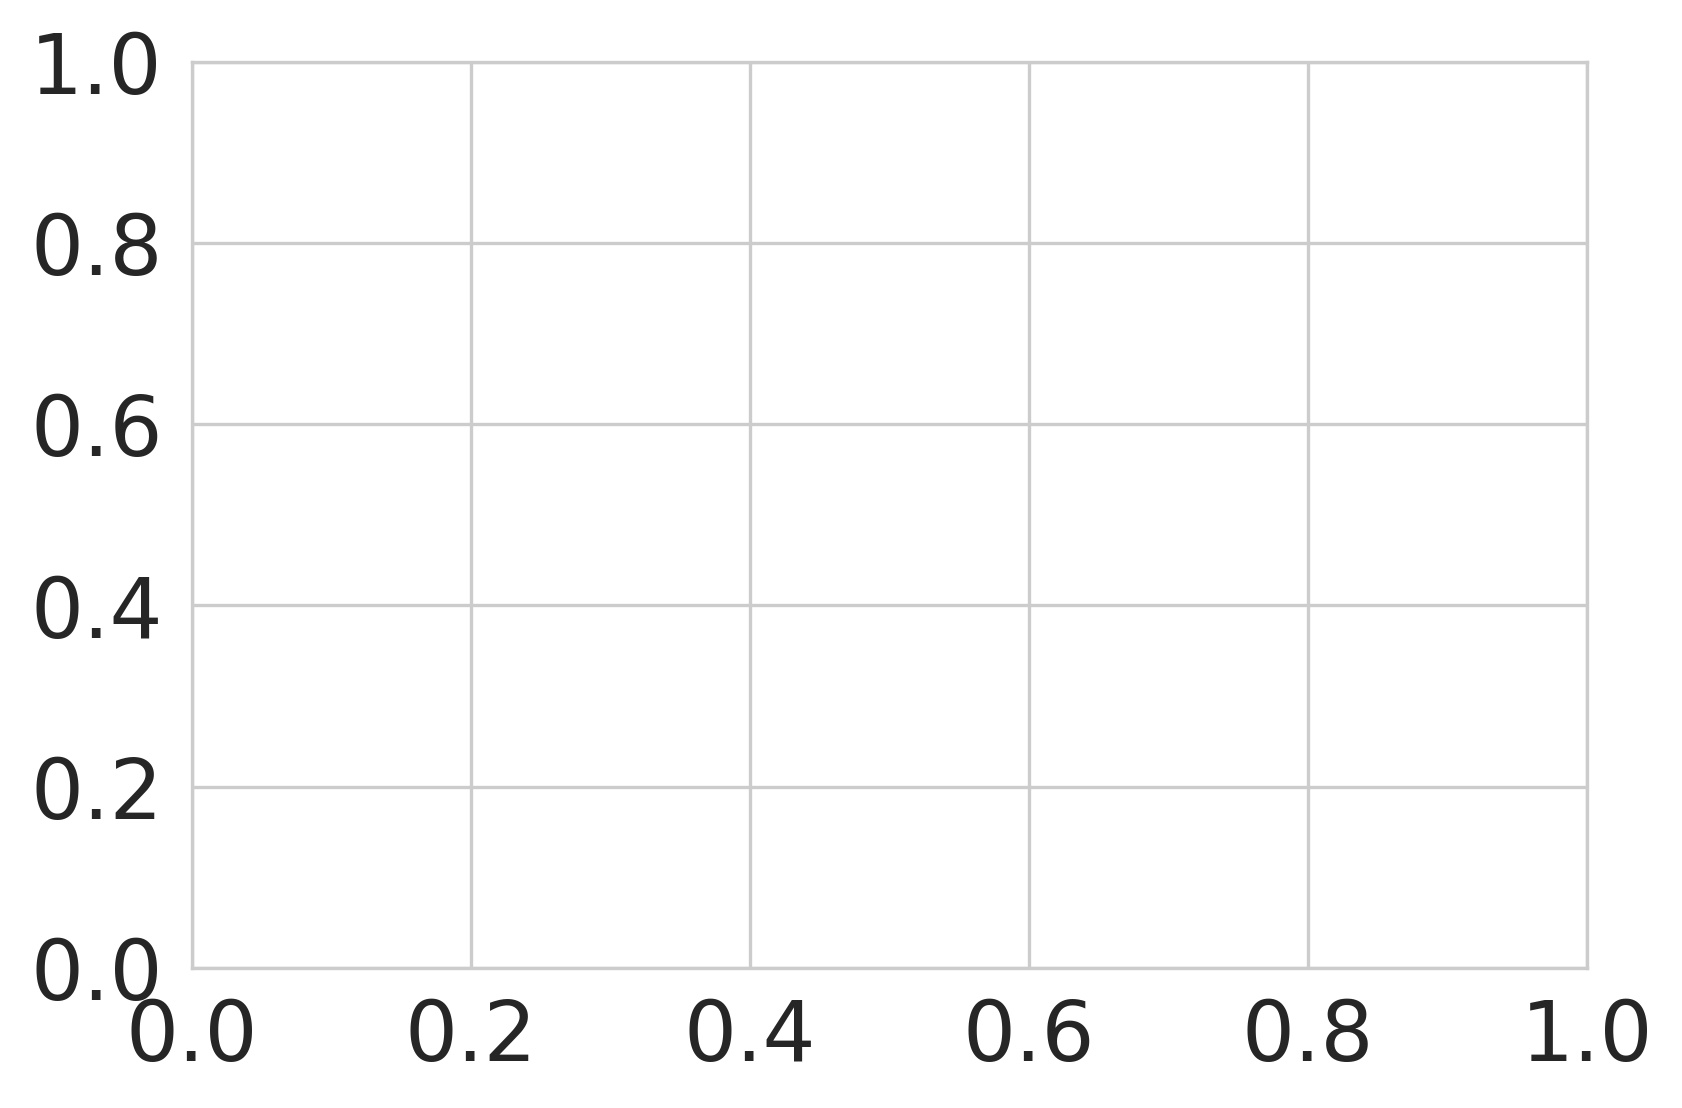

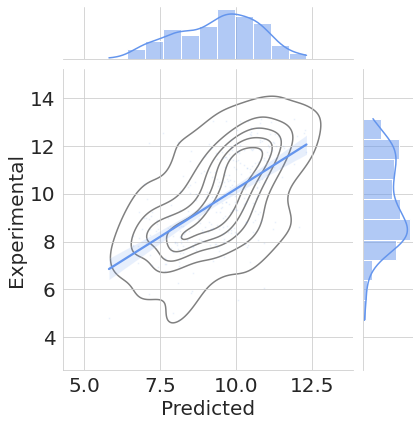

Current fold: 2
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - ETA: 0s - loss: 0.2043 - mean_squared_error: 0.20 - 0s 537us/sample - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 2/10
308/308 [==============================] - ETA: 0s - loss: 0.2767 - mean_squared_error: 0.27 - 0s 39us/sample - loss: 0.1867 - mean_squared_error: 0.1867


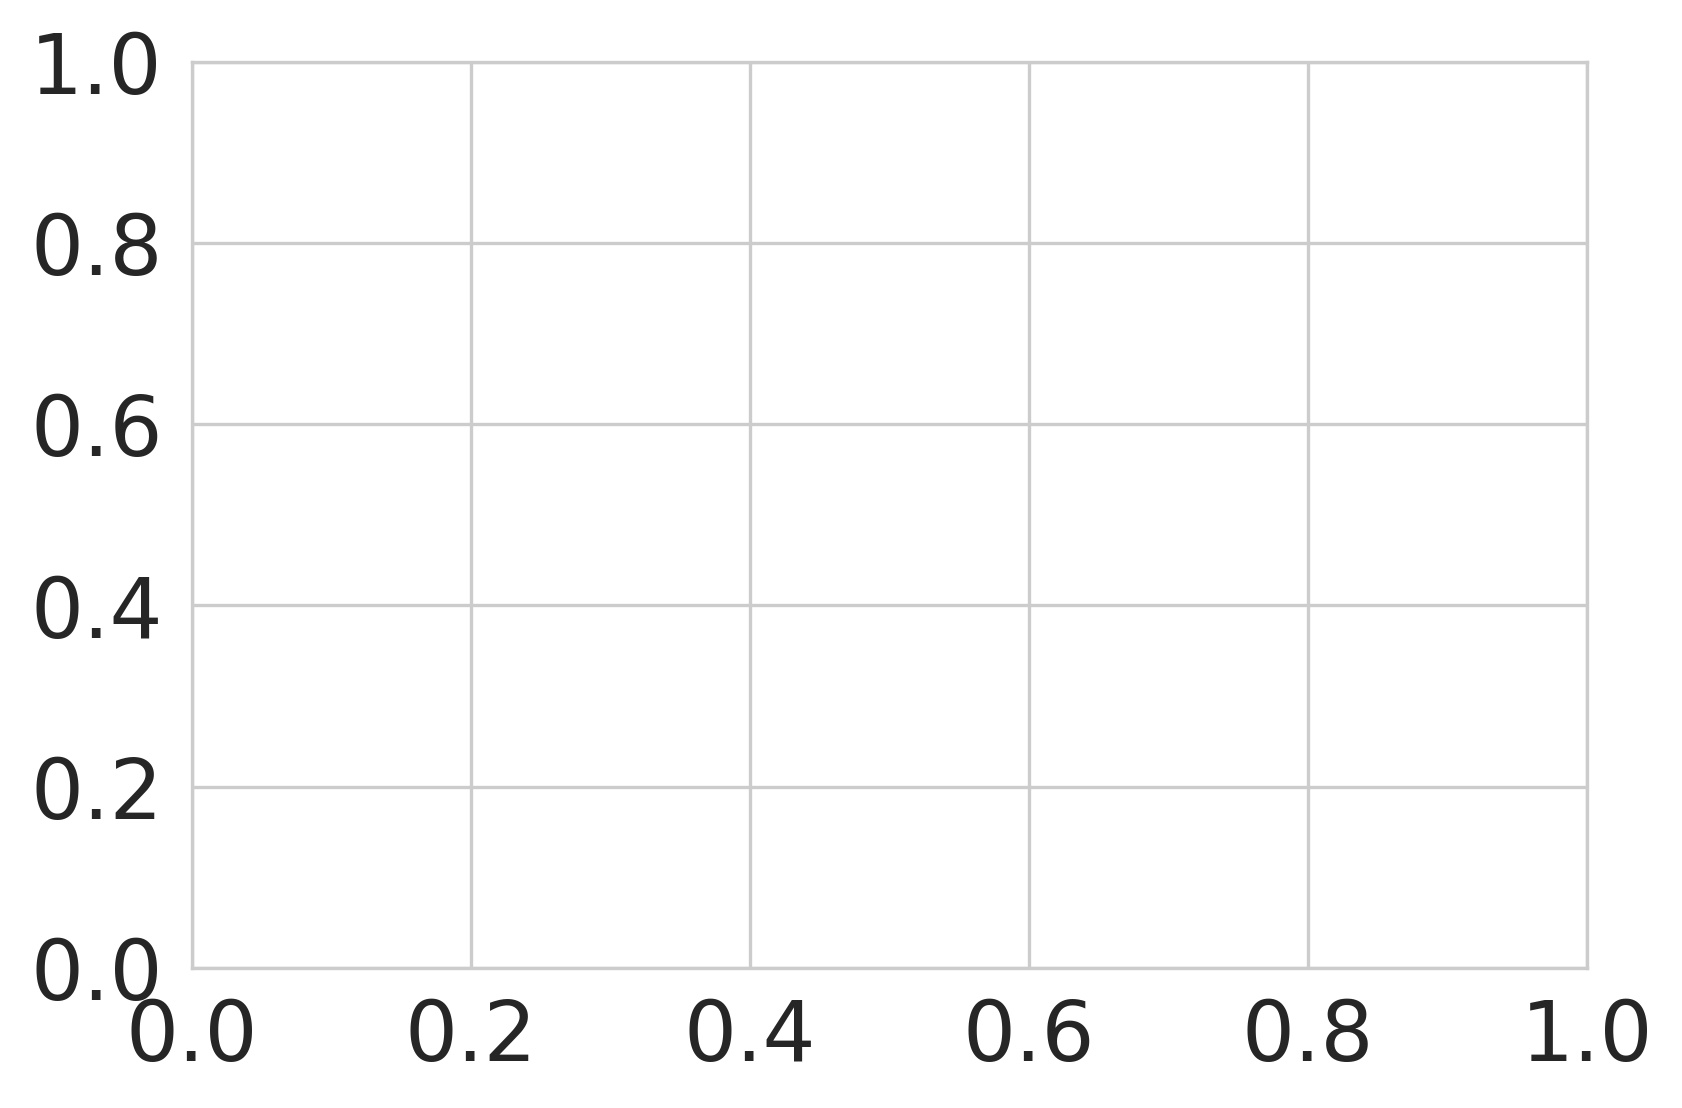

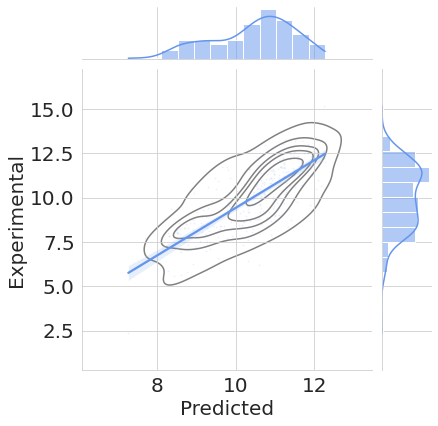

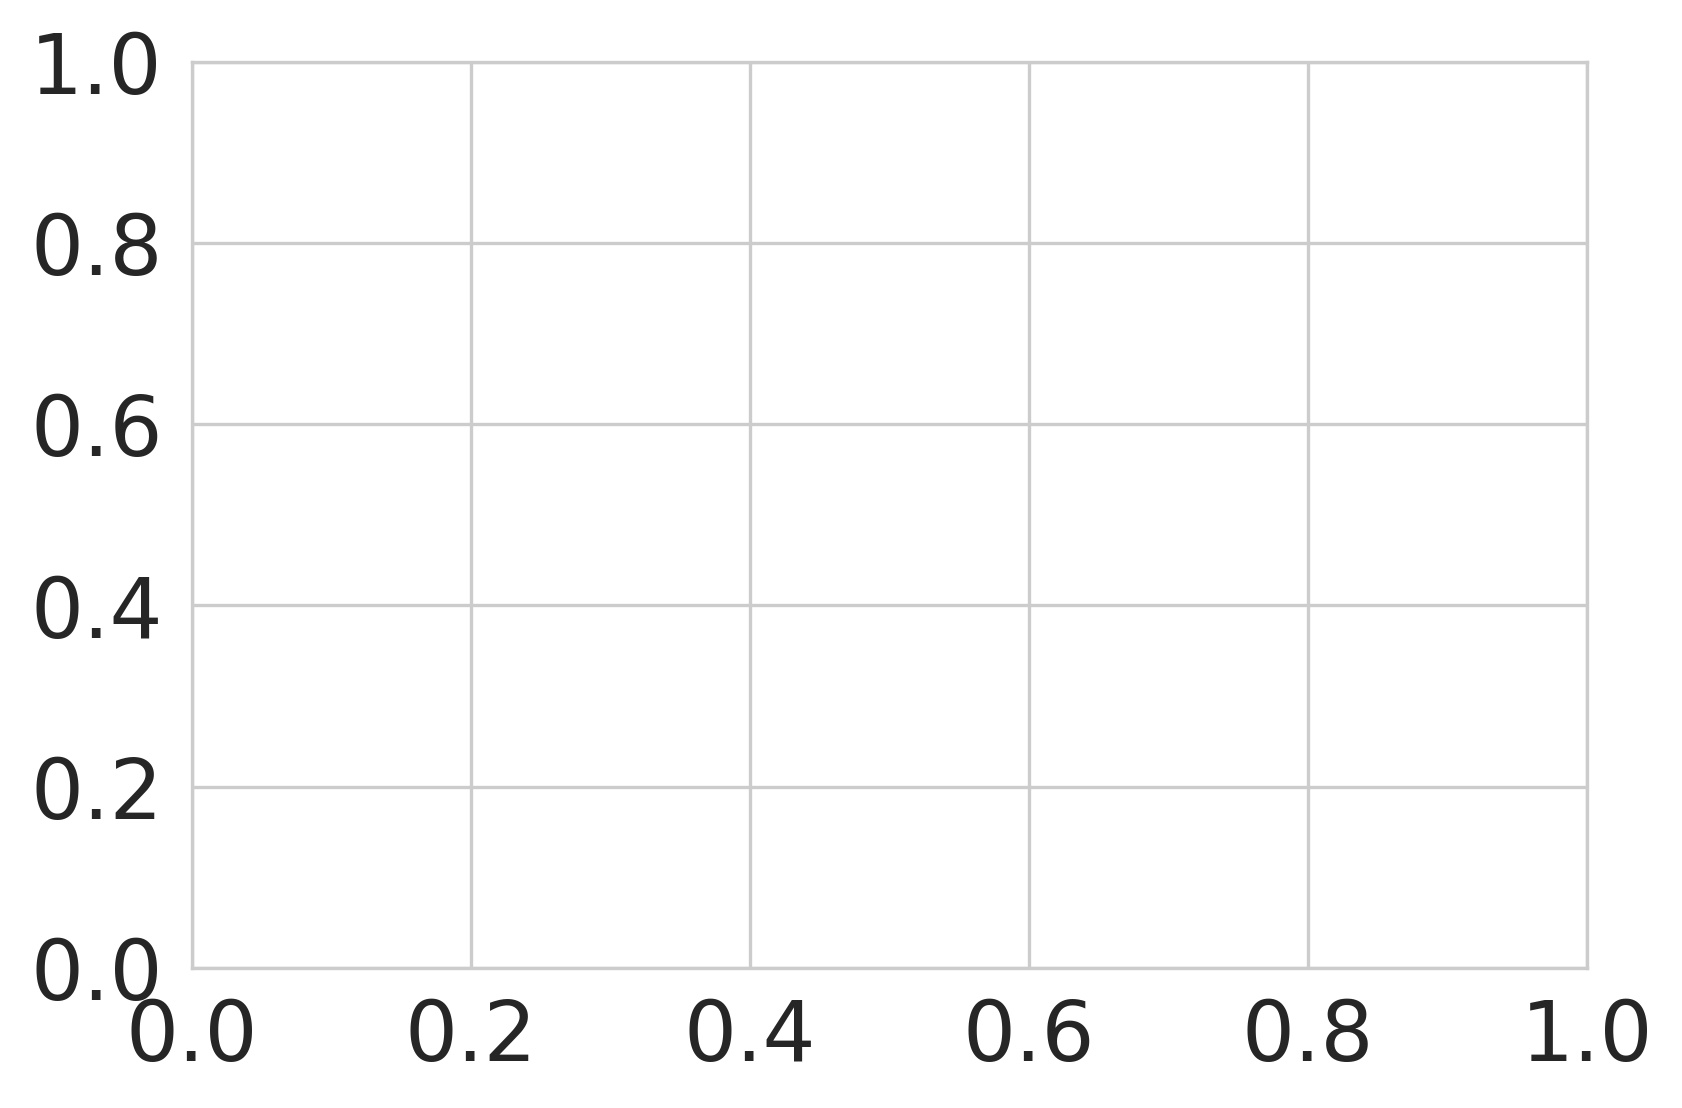

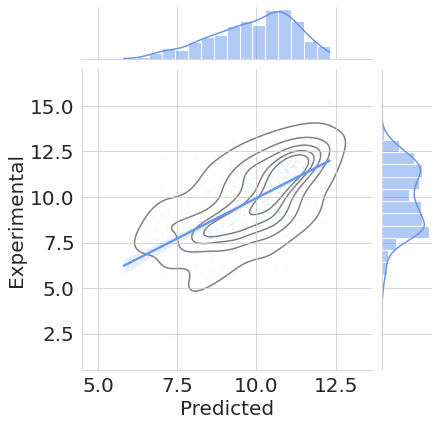

Metrics over folds: 
	Average r2:  0.4670943397224264
	Std of r2:  0.11991414609812392
	Overall r2: 0.40457465658364744, Average r2 over folds: 0.4670943397224264
Testing scrambled control now...
Current fold: 1
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - 0s 604us/sample - loss: 0.4242 - mean_squared_error: 0.4242 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 2/10
308/308 [==============================] - 0s 32us/sample - loss: 0.3843 - mean_squared_error: 0.3843


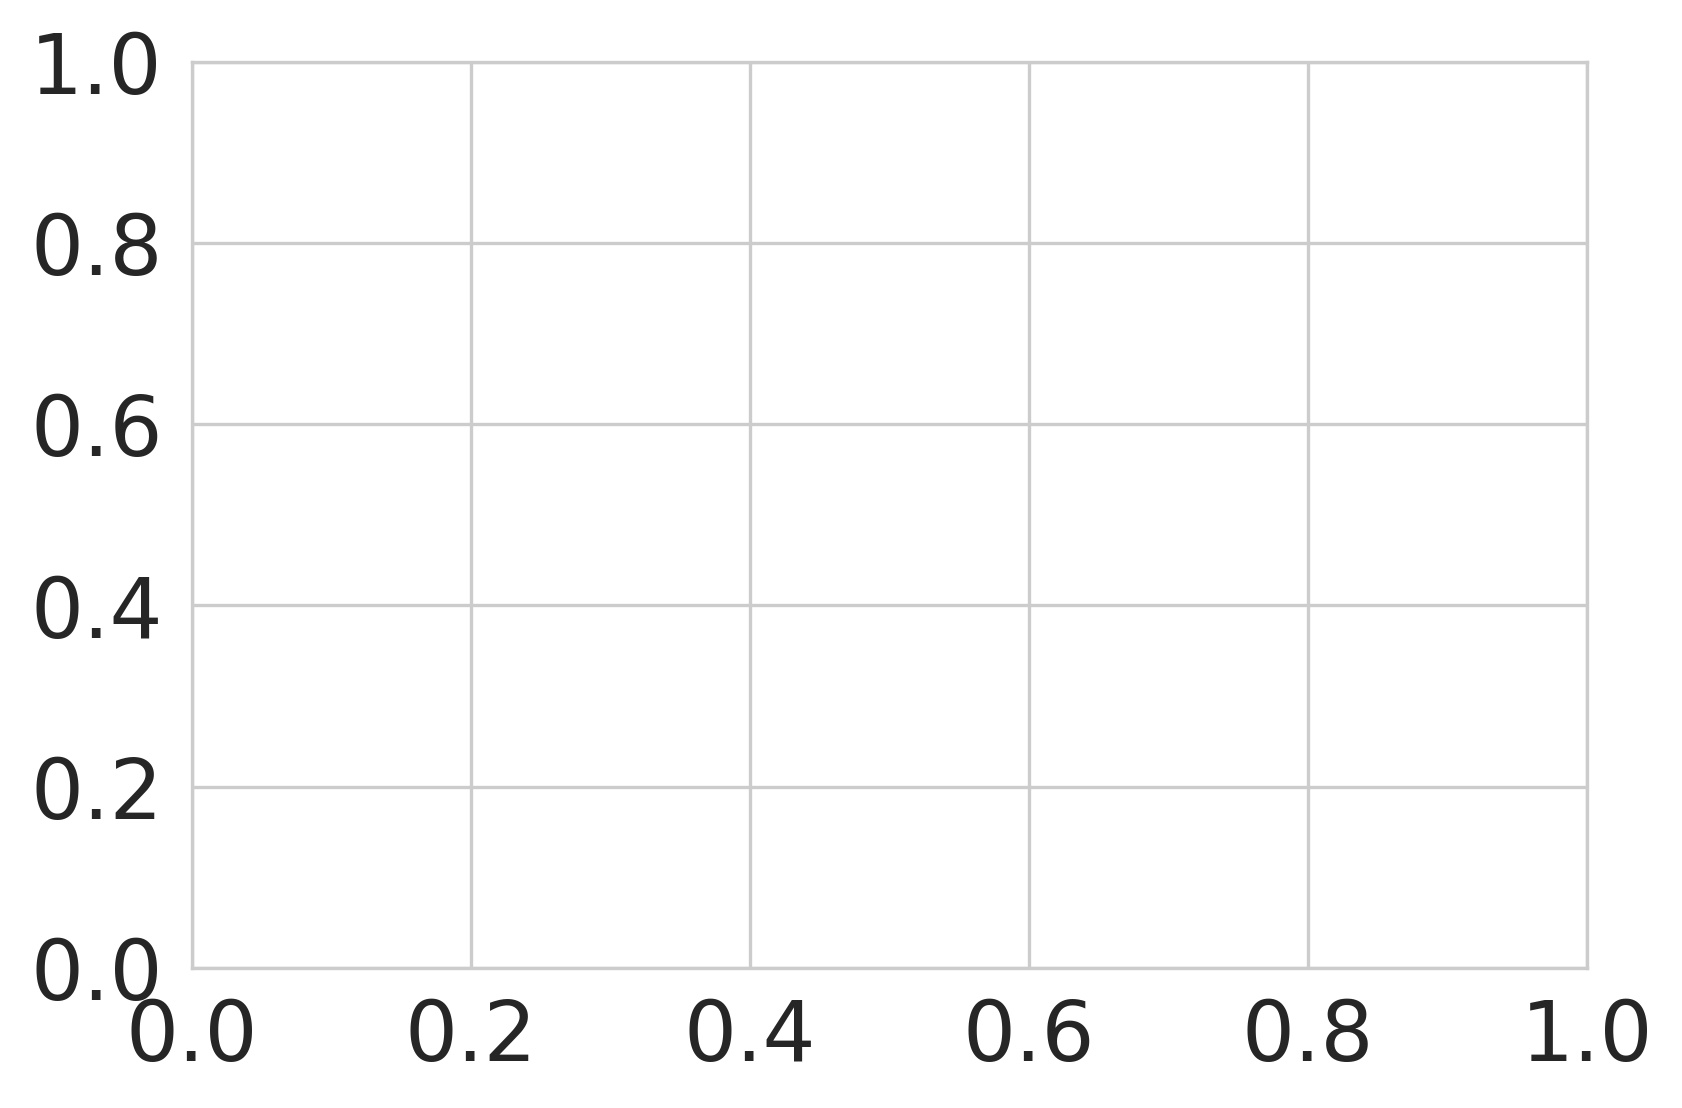

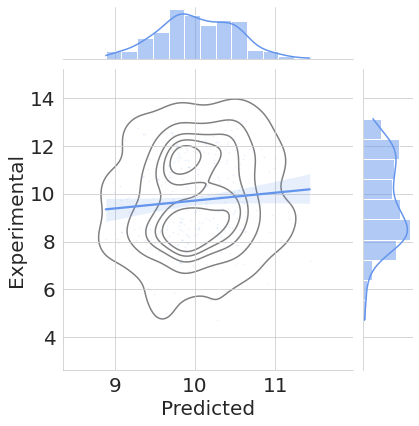

Current fold: 2
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - 0s 671us/sample - loss: 0.4547 - mean_squared_error: 0.4547 - val_loss: 0.4224 - val_mean_squared_error: 0.4224
Epoch 2/10
277/277 [==============================] - 0s 99us/sample - loss: 0.3001 - mean_squared_error: 0.3001 - val_loss: 0.3939 - val_mean_squared_error: 0.3939
Epoch 3/10
277/277 [==============================] - 0s 101us/sample - loss: 0.2198 - mean_squared_error: 0.2198 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 4/10
277/277 [==============================] - 0s 93us/sample - loss: 0.1509 - mean_squared_error: 0.1509 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 5/10
308/308 [==============================] - 0s 37us/sample - loss: 0.3831 - mean_squared_error: 0.3831


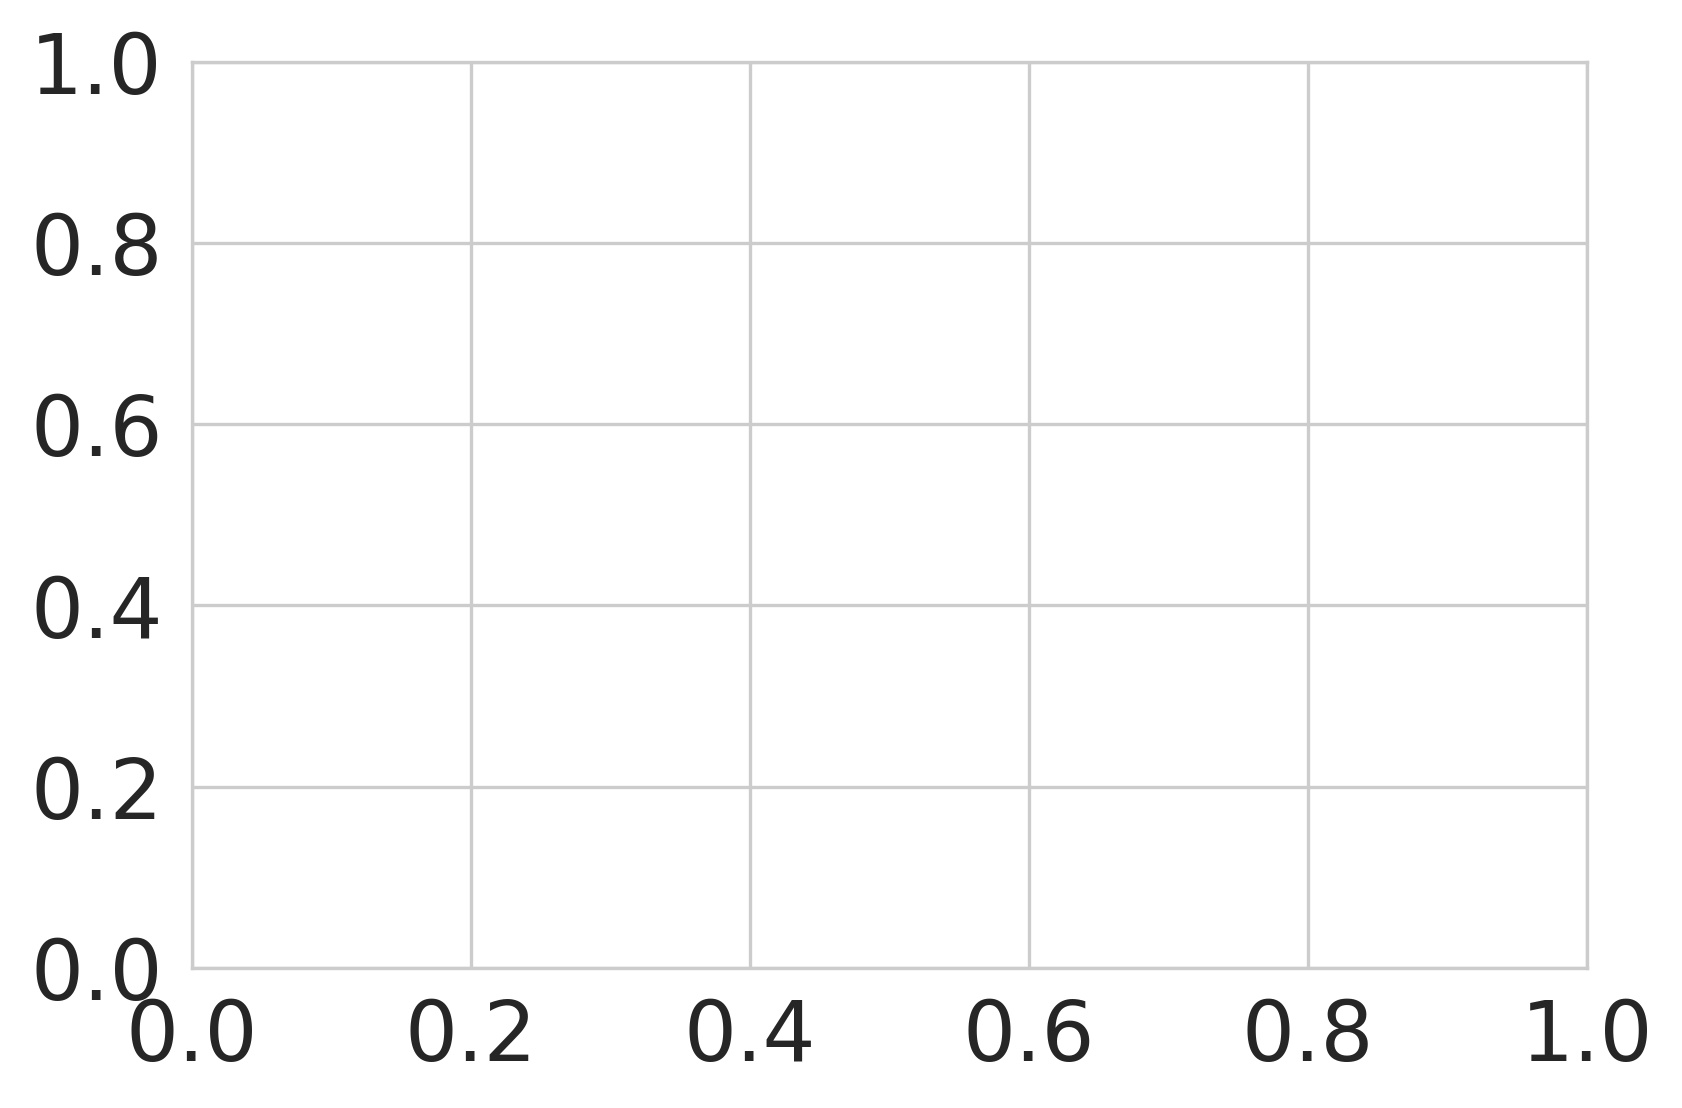

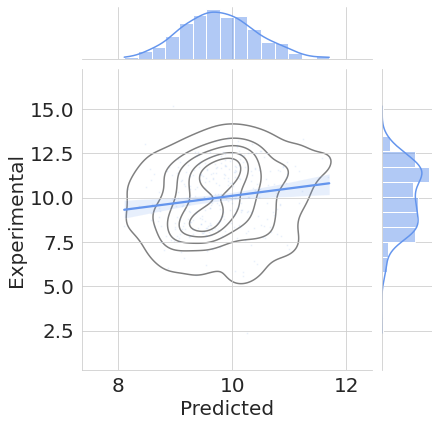

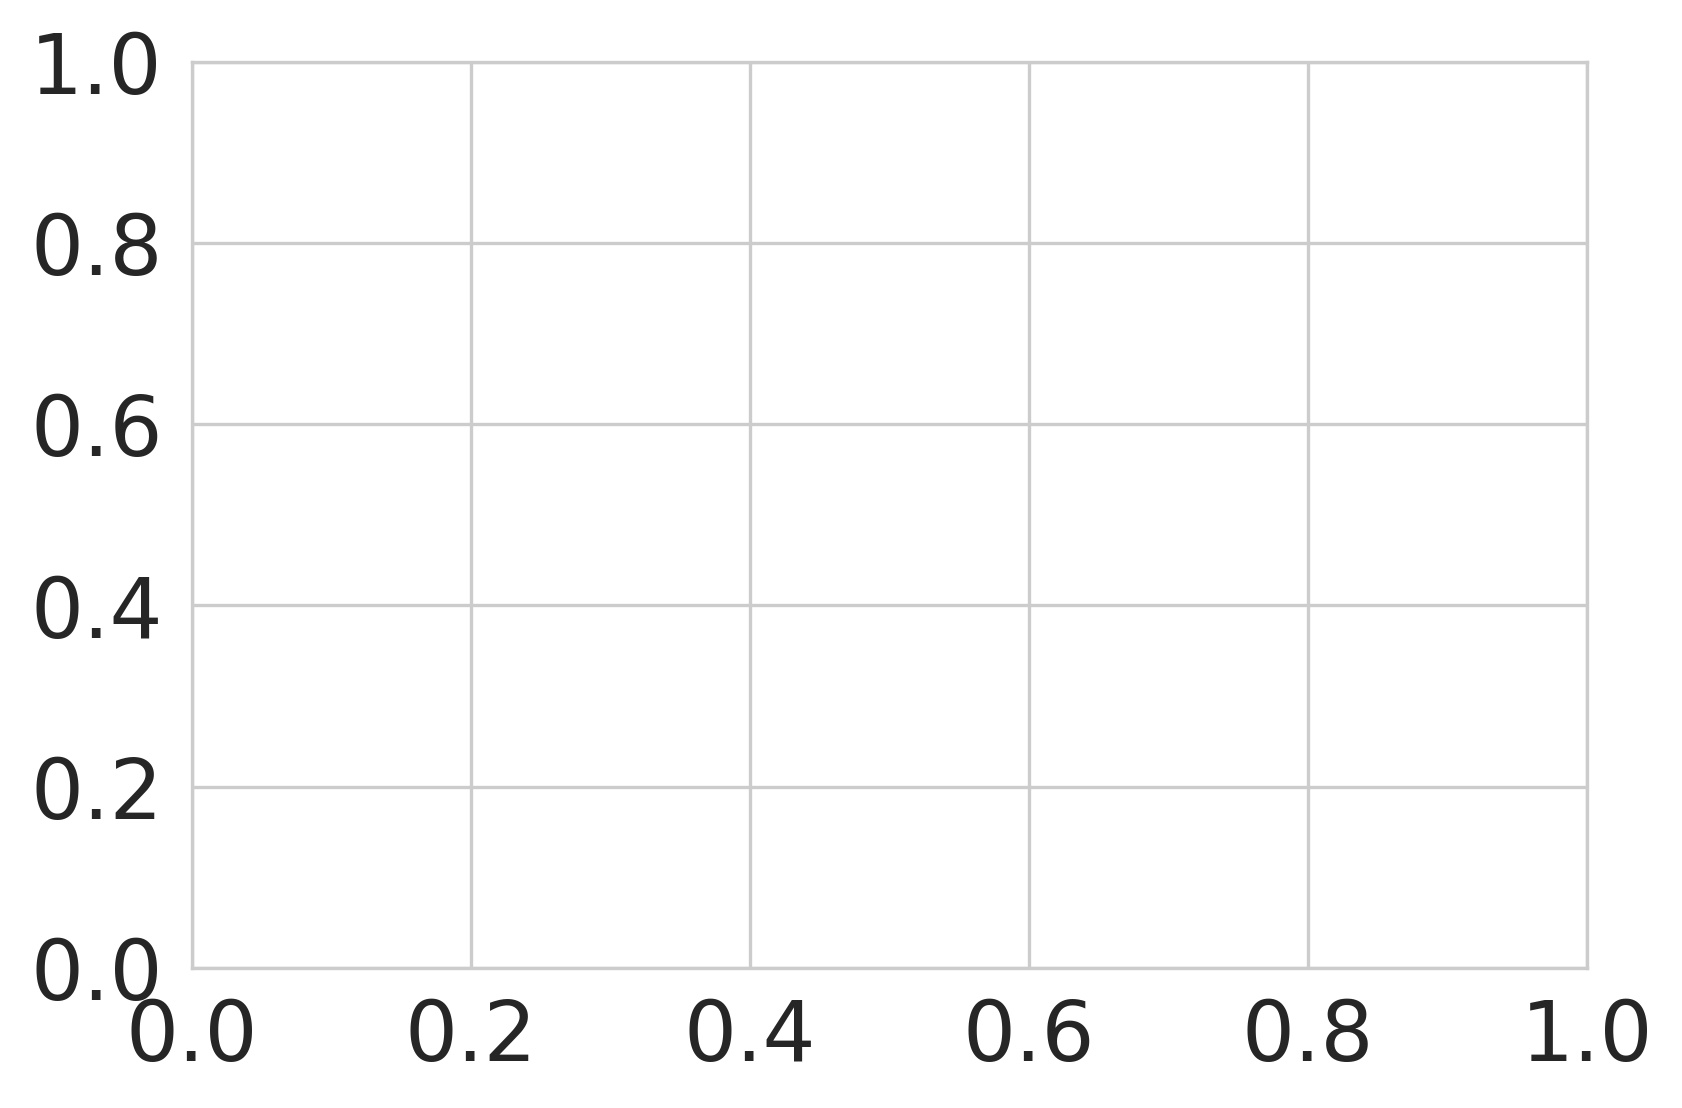

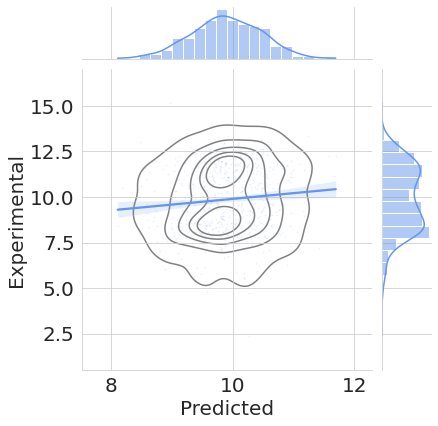

Metrics over folds: 
	Average r2:  0.01474391551979714
	Std of r2:  0.007440761943866621
	Overall r2: 0.010070953817332673, Average r2 over folds: 0.01474391551979714
Fitting final model now...
Train on 554 samples, validate on 62 samples
Epoch 1/10
554/554 [==============================] - 0s 406us/sample - loss: 0.2598 - mean_squared_error: 0.2598 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 2/10
554/554 [==============================] - 0s 97us/sample - loss: 0.1642 - mean_squared_error: 0.1642 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 3/10
554/554 [==============================] - 0s 100us/sample - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 4/10
554/554 [==============================] - 0s 91us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2466 - val_mean_squared_error: 0.2466
#################################################################################################
#

In [4]:
os.mkdir('./wenxiao1117/output/P_CDS')

data_folder = './wenxiao1117/data/'
data_file = 'P_CDS.csv'
input_col = 'Seq'
target_col = 'OD'
sequence_type = 'nucleic_acid'
verbosity = 1
task = 'regression' # binary_classification, multiclass_classification, regression

# Specify target folders for saving models and results
# Generic here - will add the tags specifying classification/regression
# as well as specific for the AutoML tool being used (i.e. /tpot/)
model_folder = './wenxiao1117/output/P_CDS/models/'
output_folder = './wenxiao1117/output/P_CDS/outputs/'

run_bioautomated(task, data_folder, data_file, sequence_type, model_folder, output_folder, input_col=input_col, target_col=target_col, max_runtime_minutes=max_runtime_minutes, num_folds=num_folds, verbosity=verbosity, num_final_epochs=num_final_epochs, yaml_params=yaml_params, num_generations=num_generations, population_size=population_size)
